In [ ]:
### This notebook takes about 2.5 hours to run

In [1]:
import matplotlib
import pylab
import random
import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
import matplotlib
import matplotlib.animation as animation
from IPython.display import Video
import matplotlib as mpl

def build_animation(states, save_name):
    """
    A function that makes a very nice animation
    Source: https://stackoverflow.com/questions/17212722/matplotlib-imshow-how-to-animate
    """
    
    fps = 5
    nSeconds = len(states)// fps

    # First set up the figure, the axis, and the plot element we want to animate
    fig = plt.figure( figsize=(8,8) )

    a = states[0]



    pylab.cla()
    im = pylab.imshow(a, vmin = 0, vmax = 6, cmap = pylab.cm.binary)


    def animate_func(i):
        if i % fps == 0:
            print( '.', end ='' )

        im.set_array(states[i])
        return [im]

    anim = animation.FuncAnimation(
                                   fig, 
                                   animate_func, 
                                   frames = nSeconds * fps,
                                   interval = 1000 / fps, # in ms
                                   )

    anim.save(save_name, fps=fps, extra_args=['-vcodec', 'libx264'])

    print('Done!')



In [3]:
def cobweb(T, h=0):
    """
    A cobweb plot for the mean-field theory at different temps T and field h
    """
    M = np.linspace(-1.2, 1.2, 100)
    d = 2
    J= 6.34369e-21
    k = 1.38065e-23
    y = np.tanh((2*d*J*M+h)/(k*T))
    plt.plot(M, y, label = "y = tanh((2*d*J*M+h)/(k*T)")
    plt.plot(M, M, label = "y = M")
    plt.title(f"Cobweb Plot for Iron magnetization when T= {T}, h = {h}")
    plt.xlabel("M")
    plt.ylabel("M")
    plt.legend()
    


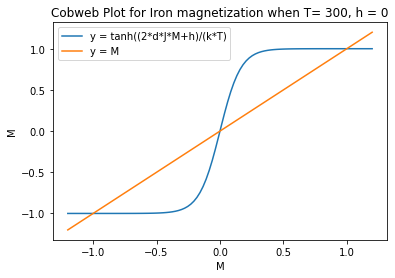

In [4]:
cobweb(T=300, h=0)

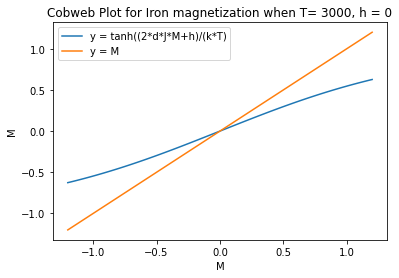

In [5]:
cobweb(T=3000, h=0)

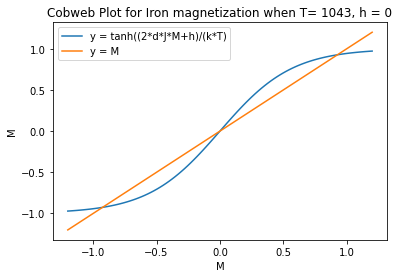

In [6]:
cobweb(T=1043, h=0)

In [7]:
def proposal(): #that's the proposal distribution of the monte carlo method
                # it randomly chooses spins and passes it to the boltzman dsitribution
    return np.random.randint(sim.size, size=2)

kB = 1.38065e-23  # Boltzmann constant

class ising_model: #building a class for the model
    def __init__(self,  T, size  ,J= 6.34369e-21):
        self.J = J
        self.size = size # this is the size of my lattice
        self.T = T
        self.config = np.zeros((self.size,self.size)) # the lattice 
        self.steps=0 # to count the number of steps
        for x in range(self.size):
            for y in range(self.size): # I start with a random configuration
                self.config[x, y] = 1 if random.random() < 0.5 else -1
                
                    
    def observe(self): #this function for observation
        pylab.cla()
        pylab.imshow(self.config, vmin = 0, vmax = 1, cmap = pylab.cm.binary)
        plt.title(f"Ising model after {self.steps} steps with T= {self.T}")
        plt.show()
        
    
    def update(self, proposal): #that's the function that will use boltzman to update the spins
        self.steps+=1
        x, y = proposal() # get the coordinate of the randomly chosen cell from the proposal distribution
        
        # calculate the energy while assuming that the external h is 0
        energy = (
                    self.J * self.config[x, y]*2   *(
                        self.config[(x + 1) % self.size, y] +
                        self.config[(x - 1) % self.size, y] +
                        self.config[x, (y + 1) % self.size] +
                        self.config[x, (y - 1) % self.size]))            
        
        #The boltzman distribution, the min function is just to make sure that probabilities are between 0 and 1
        if random.uniform(0, 1) < min(1,np.exp(-energy/ (self.T*kB) )): 
            self.config[x, y] *= -1 #changing the spin according to botlzmann


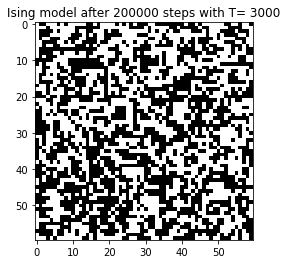

In [8]:
sim = ising_model(T = 3000, size = 60)
#sim.observe()
for j in range(200000):
    sim.update(proposal)
sim.observe()

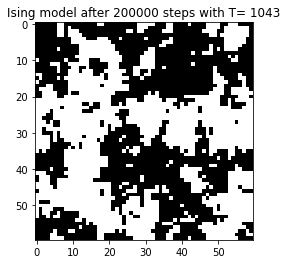

In [9]:
sim = ising_model(T = 1043, size = 60)
#sim.observe()
for j in range(200000):
    sim.update(proposal)
sim.observe()

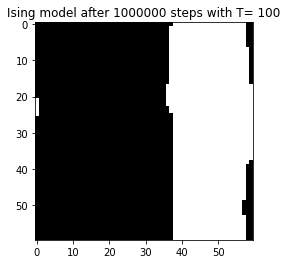

In [10]:
sim = ising_model(T = 100, size = 60)
for j in range(1000000):
    sim.update(proposal)
sim.observe()

In [11]:
# I will run 10 different iterations, each iteration will use the following temperature to calculate the change 
#in energy and magnetization.

temps_ising = [300,500, 700, 800, 900, 1000,1043,1100, 1200, 1300, 1400, 1500, 1600, 1700, 1900, 2000, 2200]

several_Es = [] # the energy
several_Es_2 = [] # the energy squared for the specific heat
several_Ms = [] # the magnetization

for iteration in range(10):
    Es = []
    Es_2 = []
    Ms = []
    for temp in temps_ising:
        sim = ising_model(T = temp, size = 20)
        for j in range(200000):
            sim.update(proposal)

        energy = 0
        energy_2 = 0
        for x in range(sim.size):
            for y in range(sim.size):
                I = (
                        -1 * sim.config[x, y]   *(
                            sim.config[(x + 1) % sim.size, y] +
                            sim.config[(x - 1) % sim.size, y] +
                            sim.config[x, (y + 1) % sim.size] +
                            sim.config[x, (y - 1) % sim.size]))

                energy+=I
                energy_2+=I**2
        Es.append(energy/(sim.size**2))
        Es_2.append(energy_2/(sim.size**2))
        Ms.append(np.mean(sim.config))
    several_Es.append(Es)
    several_Es_2.append(Es_2)
    several_Ms.append(Ms)
    print(f"done {iteration}" )
    

done 0
done 1
done 2
done 3
done 4
done 5
done 6
done 7
done 8
done 9


In [12]:
temps_ising = [300,500, 700, 800, 900, 1000,1043,1100, 1200, 1300, 1400, 1500, 1600, 1700, 1900, 2000, 2200]


Text(0, 0.5, 'Energy per spin')

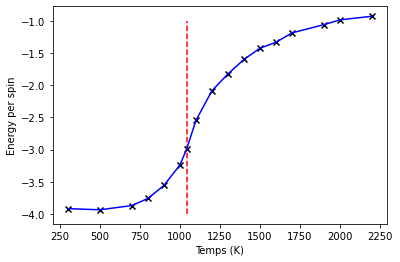

In [13]:
plt.scatter(temps_ising, np.mean(several_Es, axis=0), marker='x', color='black')
plt.plot(temps_ising, np.mean(several_Es, axis=0),  color='blue')
plt.vlines(1043, ymin = -4,  ymax = -1, color = 'red', linestyles = '--')
plt.xlabel("Temps (K)")
plt.ylabel("Energy per spin")

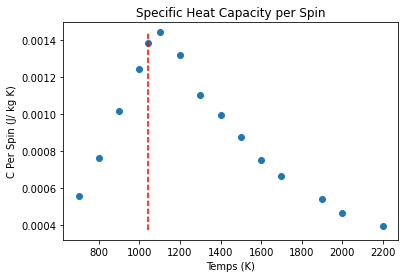

In [14]:
J= 6.34369e-21
size = 20
Es_mean = np.mean(np.array(several_Es), axis=0)
Es_2_mean =np.mean(np.array(several_Es_2), axis=0)

c = ((np.array(Es_2_mean)-(np.array(Es_mean)**2))/(kB*np.array(temps_ising)**2)) 
c = c*J
plt.scatter(temps_ising[2:], c[2:])
plt.vlines(1043, ymin = min(c),  ymax = max(c),  color = 'red', linestyles = '--')
plt.xlabel("Temps (K)")
plt.ylabel("C Per Spin (J/ kg K)")
plt.title("Specific Heat Capacity per Spin")
plt.show()

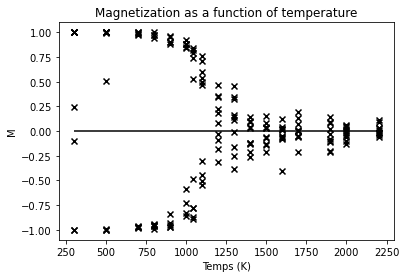

In [15]:
for i in range(len(several_Ms)):
    plt.scatter(temps_ising, several_Ms[i], color = "black", marker = "x")
plt.hlines(0, xmin = min(temps_ising), xmax = max(temps_ising), color='black')

plt.xlabel("Temps (K)")
plt.ylabel("M")
plt.title("Magnetization as a function of temperature")
plt.show()

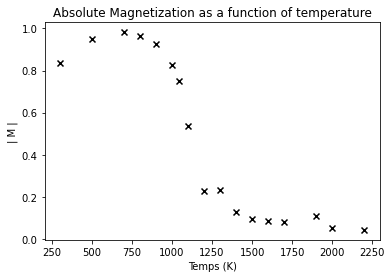

In [16]:
plt.scatter(temps_ising, np.mean(np.abs(several_Ms), axis=0), color = "black", marker = "x")

plt.xlabel("Temps (K)")
plt.ylabel("| M |")
plt.title("Absolute Magnetization as a function of temperature")
plt.show()

In [17]:
def kr_delta(x1, x2=1):
    """
    The Kronecker delta function.
    """
    if x1==x2:
        return 1
    else:
        return 0
    
    
def proposal(): #that's the proposal distribution of the monte carlo method
                # it randomly chooses spins and passes it to the boltzman dsitribution
    return np.random.randint(sim.size, size=2)

kB = 1.38065e-23  # Boltzmann constant 

class potts_model: #building a class for the model
    def __init__(self,  T, size, r=3  ,J= 6.34369e-21):
        self.J = J
        self.size = size # this is the size of my lattice
        self.T = T
        self.r = r
        self.config = np.zeros((self.size,self.size)) # the lattice 
        self.steps=0 # to count the number of steps
        for x in range(self.size):
            for y in range(self.size): # I start with a random configuration
                self.config[x, y] = random.choice(range(1, self.r+1))
                
                     
    def observe(self): #this function for observation
        pylab.cla()
        pylab.imshow(self.config, cmap = plt.cm.jet)
        plt.colorbar()

        plt.title(f"The Potts model after {self.steps} steps at {self.T} Kelvin")
        plt.show()
    
    def update(self, proposal): #that's the function that will use boltzman to update the spins
        self.steps+=1
        x, y = proposal() # get the coordinate of the randomly chosen cell from the proposal distribution
        
        # calculate the energy  while assuming that the external h is 0
        energy = (
                    -1*self.J    *(
                        kr_delta(self.config[x, y],self.config[(x + 1) % self.size, y]) +
                        kr_delta(self.config[x, y],self.config[(x - 1) % self.size, y]) +
                        kr_delta(self.config[x, y],self.config[x, (y + 1) % self.size]) +
                        kr_delta(self.config[x, y],self.config[x, (y - 1) % self.size])))            
        
        #The boltzman distribution, the min function is just to make sure that probabilities are between 0 and 1
        if random.uniform(0, 1) < min(1,np.exp(energy/ (self.T*kB) )): 
            self.config[x, y] = random.choice([i for i in range(1, self.r+1) if i != self.config[x, y]]) #changing the spin according to botlzmann


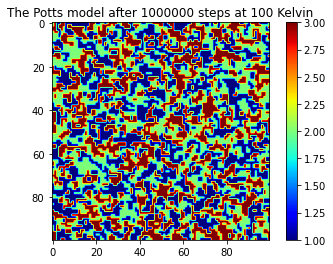

In [18]:
sim = potts_model(T = 100, size = 100, r=3)
for j in range(1000000):
    sim.update(proposal)
   
sim.observe()


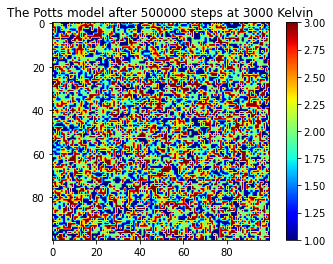

In [19]:
sim = potts_model(T = 3000, size = 100, r=3)
for j in range(500000):
    sim.update(proposal)
   
sim.observe()


In [20]:
# I will run 10 different iterations, each iteration will use the following temperature to calculate the change 
#in energy and magnetization.
temps_3 = [200, 250, 280,300,350,400, 450,475,500,600, 700, 800, 900, 1000]
several_Es_potts_3 = []
several_Es_2_potts_3 = []
several_Ms_potts_3 = []

for iteration in range(10):
    Es = []
    Es_2 = []
    Ms = []
    for temp in temps_3:
        sim = potts_model(T = temp, size = 10, r=3)
        for j in range(500000):
            sim.update(proposal)

        
        # the following is the equation for the mangeitzation that I explained in the report
        N = (sim.size)**2
        N_max = max([list(sim.config.ravel()).count(i) for i in range(1, sim.r+1)])
        M=(((N_max*sim.r)/N) - 1) /(sim.r-1) 
        
        
        energy = 0
        energy_2 = 0
        for x in range(sim.size):
            for y in range(sim.size):
                I =  (
                    -1*(
                        kr_delta(sim.config[x, y],sim.config[(x + 1) % sim.size, y]) +
                        kr_delta(sim.config[x, y],sim.config[(x - 1) % sim.size, y]) +
                        kr_delta(sim.config[x, y],sim.config[x, (y + 1) % sim.size]) +
                        kr_delta(sim.config[x, y],sim.config[x, (y - 1) % sim.size])))

                energy+=I
                energy_2+=I**2
        Es.append(energy/(sim.size**2))
        Es_2.append(energy_2/(sim.size**2))
        Ms.append(M)
    several_Es_potts_3.append(Es)
    several_Es_2_potts_3.append(Es_2)
    several_Ms_potts_3.append(Ms)
    print(f"done {iteration}" )
    

done 0
done 1
done 2
done 3
done 4
done 5
done 6
done 7
done 8
done 9


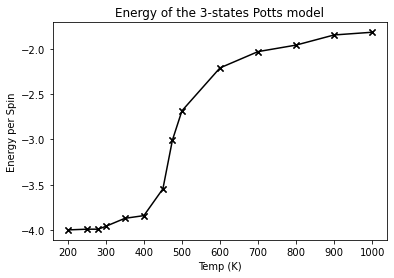

In [21]:
plt.scatter(temps_3, np.mean(several_Es_potts_3, axis=0), marker='x',  color = 'black')
plt.plot(temps_3, np.mean(several_Es_potts_3, axis=0), marker='x', color = 'black')
plt.xlabel("Temp (K)")
plt.ylabel("Energy per Spin")
plt.title("Energy of the 3-states Potts model")
plt.show()

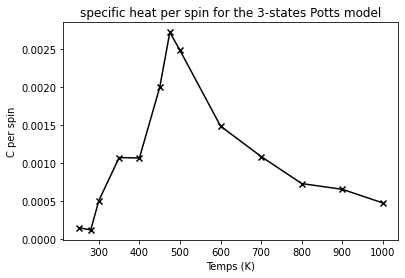

In [22]:
Es_potts_mean_3 = np.mean(several_Es_potts_3, axis=0)
Es_2_potts_mean_3 = np.mean(several_Es_2_potts_3, axis=0)

c = (np.array(Es_2_potts_mean_3)-(np.array(Es_potts_mean_3)**2))/(kB*np.array(temps_3)**2)
J= 6.34369e-21
c = c*J
plt.scatter(temps_3[1:], c[1:], marker ="x", color = 'black')
plt.plot(temps_3[1:], c[1:], color = 'black')

plt.xlabel("Temps (K)")
plt.ylabel("C per spin")
plt.title("specific heat per spin for the 3-states Potts model")
plt.show()

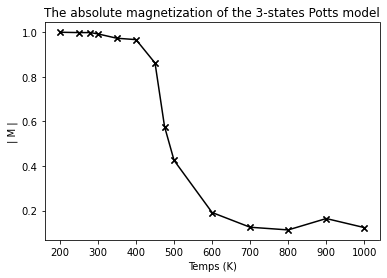

In [23]:
plt.scatter(temps_3, abs(np.mean(several_Ms_potts_3, axis=0)), marker='x', color  = 'black')
plt.plot(temps_3, abs(np.mean(several_Ms_potts_3, axis=0)), marker='x', color  = 'black')
plt.xlabel("Temps (K)")
plt.ylabel("| M |")
plt.title("The absolute magnetization of the 3-states Potts model")
plt.show()

In [24]:
# I will run 10 different iterations, each iteration will use the following temperature to calculate the change 
#in energy and magnetization.
temps = [200, 250, 280,300,350,400, 450,500, 550,600, 700, 800, 900, 1000]
several_Es_potts = []
several_Es_2_potts = []
several_Ms_potts = []

for iteration in range(10):
    Es = []
    Es_2 = []
    Ms = []
    for temp in temps:
        sim = potts_model(T = temp, size = 10, r=10)
        for j in range(500000):
            sim.update(proposal)

        N = (sim.size)**2
        N_max = max([list(sim.config.ravel()).count(i) for i in range(1, sim.r+1)])
        M=(((N_max*sim.r)/N) - 1) /(sim.r-1) 
        energy = 0
        energy_2 = 0
        for x in range(sim.size):
            for y in range(sim.size):
                I =  (
                    -1*(
                        kr_delta(sim.config[x, y],sim.config[(x + 1) % sim.size, y]) +
                        kr_delta(sim.config[x, y],sim.config[(x - 1) % sim.size, y]) +
                        kr_delta(sim.config[x, y],sim.config[x, (y + 1) % sim.size]) +
                        kr_delta(sim.config[x, y],sim.config[x, (y - 1) % sim.size])))

                energy+=I
                energy_2+=I**2
        Es.append(energy/(sim.size**2))
        Es_2.append(energy_2/(sim.size**2))
        Ms.append(M)
    several_Es_potts.append(Es)
    several_Es_2_potts.append(Es_2)
    several_Ms_potts.append(Ms)
    print(f"done {iteration}" )
    

done 0
done 1
done 2
done 3
done 4
done 5
done 6
done 7
done 8
done 9


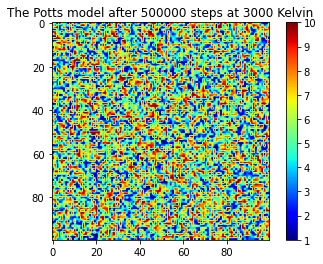

In [25]:
sim = potts_model(T = 3000, size = 100, r=10)
for j in range(500000):
    sim.update(proposal)
   
sim.observe()


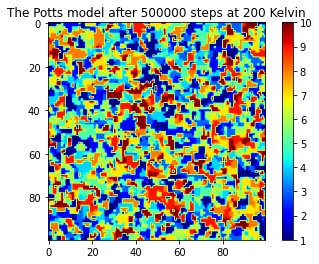

In [26]:
sim = potts_model(T = 200, size = 100, r=10)
for j in range(500000):
    sim.update(proposal)
   
sim.observe()


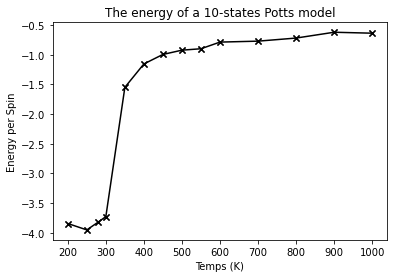

In [27]:
plt.scatter(temps, np.mean(several_Es_potts, axis=0), marker='x', color= 'black')
plt.plot(temps, np.mean(several_Es_potts, axis=0), marker='x', color = 'black')
plt.xlabel("Temps (K)")
plt.ylabel("Energy per Spin")
plt.title("The energy of a 10-states Potts model")
plt.show()

In [28]:
#Es_potts_mean = np.mean(several_Es_potts, axis=0)
#Es_2_potts_mean = np.mean(several_Es_2_potts, axis=0)

#c = (np.array(Es_2_potts_mean)-(np.array(Es_potts_mean)**2))/(kB*np.array(temps)**2)
#plt.scatter(temps, c)
#plt.plot(temps, c)

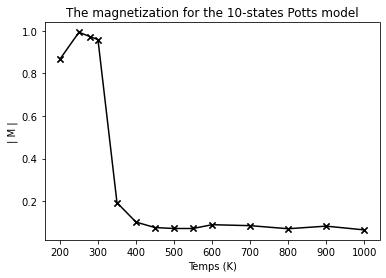

In [29]:
plt.scatter(temps, abs(np.mean(several_Ms_potts, axis=0)), marker='x', color = 'black')
plt.plot(temps, abs(np.mean(several_Ms_potts, axis=0)), marker='x', color = 'black')
plt.xlabel("Temps (K)")
plt.ylabel("| M |")
plt.title("The magnetization for the 10-states Potts model")
plt.show()

In [30]:
def proposal(): #that's the proposal distribution of the monte carlo method
                # it randomly chooses spins and passes it to the boltzman dsitribution
    return np.random.randint(sim.size, size=2)

J = 1/0.4  # Interaction constant for iron [Joule]
kB = 1.38065e-23  # Boltzmann constant [Joule / Kelvin]

class xy_model: #building a class for the model
    def __init__(self,  T,   size,pi = np.pi  ,J= 6.34369e-21,):
        self.J = J
        self.size = size # this is the size of my lattice
        self.T = T
        self.config = np.zeros((self.size,self.size)) # the lattice 
        self.steps=0 # to count the number of steps
        self.pi = pi
        for x in range(self.size):
            for y in range(self.size): # I start with a random configuration
                self.config[x, y] = random.uniform(-1*self.pi, self.pi)
                
                    
    def observe(self): #this function for observation
        pylab.cla()
        pylab.imshow(self.config, cmap = "hsv") # the cyclic hsv fits the plotting of cyclic angles better
        plt.colorbar()
        plt.title(f"The XY model after {self.steps} steps at {self.T} Kelvin")
        plt.show()
        
    
    def update(self, proposal): #that's the function that will use boltzman to update the spins
        self.steps+=1
        x, y = proposal() # get the coordinate of the randomly chosen cell from the proposal distribution
        
        # calculate the energy while assuming that the external h is 0
        energy = (
                    -1 *self.J*(
                        np.cos(self.config[x, y]-self.config[(x + 1) % self.size, y]) +
                        np.cos(self.config[x, y]-self.config[(x - 1) % self.size, y]) +
                        np.cos(self.config[x, y]-self.config[x, (y + 1) % self.size] )+
                        np.cos(self.config[x, y]-self.config[x, (y - 1) % self.size])))            
        
        #The boltzman distribution, the min function is just to make sure that probabilities are between 0 and 1
        #quant = 1/.4
        if random.uniform(0, 1) < min(1,np.exp(energy/(self.T*kB) )): 
            self.config[x, y] = random.uniform(-1*self.pi, self.pi)

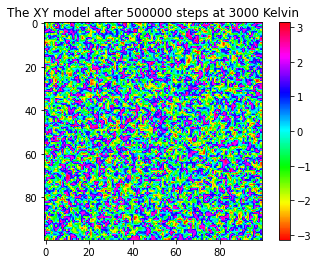

In [31]:
sim = xy_model(T = 3000, size = 100)
for j in range(500000):
    sim.update(proposal)
   
sim.observe()

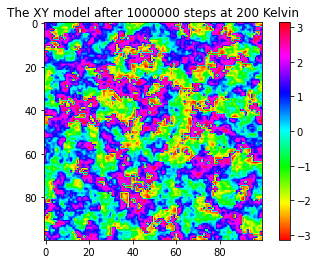

In [32]:
sim = xy_model(T = 200, size = 100)
for j in range(1000000):
    sim.update(proposal)
   
sim.observe()

In [33]:
# I will run 10 different iterations, each iteration will use the following temperature to calculate the change 
#in energy and magnetization.
temps = [200, 250, 280,300,350,400, 450,500, 550,600, 700, 800, 900, 1000]
several_Es_xy = []
several_Es_2_xy = []
several_Ms_xy= []

for iteration in range(10):
    Es = []
    Es_2 = []
    Ms = []
    for temp in temps:
        sim = xy_model(T = temp, size = 10)
        for j in range(500000):
            sim.update(proposal)

        #using the equation that I explained in the report for the magnetization
        angles = []
        for s_i in sim.config.ravel():
            angles.append((np.cos(s_i), np.sin(s_i)))

        M = np.linalg.norm(np.sum(np.array(angles), 0)) / sim.size**2 
        energy = 0
        energy_2 = 0
        for x in range(sim.size):
            for y in range(sim.size):
                I =(
                    -1 *(
                        np.cos(sim.config[x, y]-sim.config[(x + 1) % sim.size, y]) +
                        np.cos(sim.config[x, y]-sim.config[(x - 1) % sim.size, y]) +
                        np.cos(sim.config[x, y]-sim.config[x, (y + 1) % sim.size] )+
                        np.cos(sim.config[x, y]-sim.config[x, (y - 1) % sim.size])))

                energy+=I
                energy_2+=I**2
        Es.append(energy/(sim.size**2))
        Es_2.append(energy_2/(sim.size**2))
        Ms.append(M)
    several_Es_xy.append(Es)
    several_Es_2_xy.append(Es_2)
    several_Ms_xy.append(Ms)
    print(f"done {iteration}" )
    

done 0
done 1
done 2
done 3
done 4
done 5
done 6
done 7
done 8
done 9


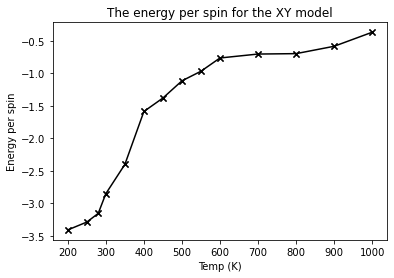

In [34]:
plt.scatter(temps, np.mean(several_Es_xy, axis=0), marker='x', color ='black')
plt.plot(temps, np.mean(several_Es_xy, axis=0), marker='x', color ='black')
plt.xlabel("Temp (K)")
plt.ylabel("Energy per spin")
plt.title("The energy per spin for the XY model")
plt.show()

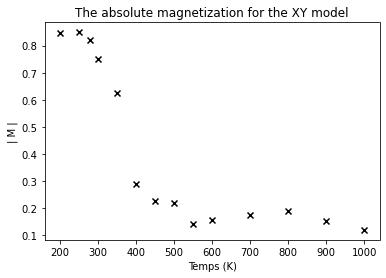

In [35]:
plt.scatter(temps, abs(np.mean(several_Ms_xy, axis=0)), marker='x', color= 'black')
plt.xlabel("Temps (K)")
plt.ylabel("| M |")
plt.title("The absolute magnetization for the XY model")
plt.show()

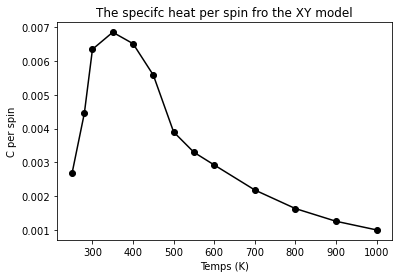

In [36]:
Es_xy_mean = np.mean(several_Es_xy, axis=0)
Es_2_xy_mean = np.mean(several_Es_2_xy, axis=0)
J= 6.34369e-21
c = (np.array(Es_2_xy_mean)-(np.array(Es_xy_mean)**2))/(kB*np.array(temps)**2)
c  =  c*J
plt.scatter(temps[1:], c[1:], color = 'black')
plt.plot(temps[1:], c[1:], color = 'black')
plt.xlabel("Temps (K)")
plt.ylabel("C per spin")
plt.title("The specifc heat per spin fro the XY model")
plt.show()